<a href="https://colab.research.google.com/github/mehtabr1212/The-Sparks-Foundation/blob/TSF_Task-2/TSF_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name: Mehtab Singh Randhawa
# The Sparks Foundation (Data Science & Business Analytics internship)
## Task 2 - Predict the optimum number of clusters and represent it visually

### Step 1: Load the dataset

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns

iris_data = pd.read_csv('/content/Iris.csv')

### Step 2: Preprocess the data

Ensuring the data is clean and ready for clustering.

In [60]:
# Checking for missing values
print(iris_data.isnull().sum())

# Droping non-numeric columns
if 'species' in iris_data.columns:
    iris_data = iris_data.drop('species', axis=1)

# Displaying summary statistics
print(iris_data.describe())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


### Step 3: Determine the optimal number of clusters using the Elbow method

Using K-Means clustering and ploting the sum of squared distances (inertia) for different values of k.

In [61]:
# Printing the column names in the dataset
print(iris_data.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [62]:
# Performing one-hot encoding on the 'Species' column
iris_data_encoded = pd.get_dummies(iris_data, columns=['Species'])

# Checking the data types
print(iris_data_encoded.dtypes)

Id                           int64
SepalLengthCm              float64
SepalWidthCm               float64
PetalLengthCm              float64
PetalWidthCm               float64
Species_Iris-setosa           bool
Species_Iris-versicolor       bool
Species_Iris-virginica        bool
dtype: object


In [63]:
# Checking for missing values
missing_values = iris_data_encoded.isnull().sum()
print(missing_values)

Id                         0
SepalLengthCm              0
SepalWidthCm               0
PetalLengthCm              0
PetalWidthCm               0
Species_Iris-setosa        0
Species_Iris-versicolor    0
Species_Iris-virginica     0
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

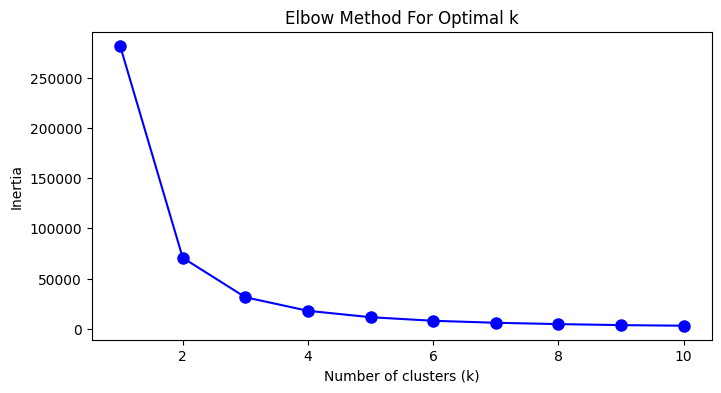

In [64]:
# Determining the optimal number of clusters using the Elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris_data_encoded)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

**Interpreting the Elbow Plot:**

* The x-axis represents the number of clusters k.
* The y-axis represents the inertia (sum of squared distances).
* The "elbow point" is where the rate of decrease sharply slows down. This is typically considered the optimal number of clusters.

Here, the inertia decreases significantly up to 𝑘=3 and then the decrease slows down, 𝑘=3 would be the optimal number of clusters.

### Step 4: Visualizing Clusters Using PCA-Reduced 2D Plot
Visualizing Clusters Using a 2D Plot for Iris Dataset with First 2 Features ('SepalLengthCm' and 'SepalWidthCm')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


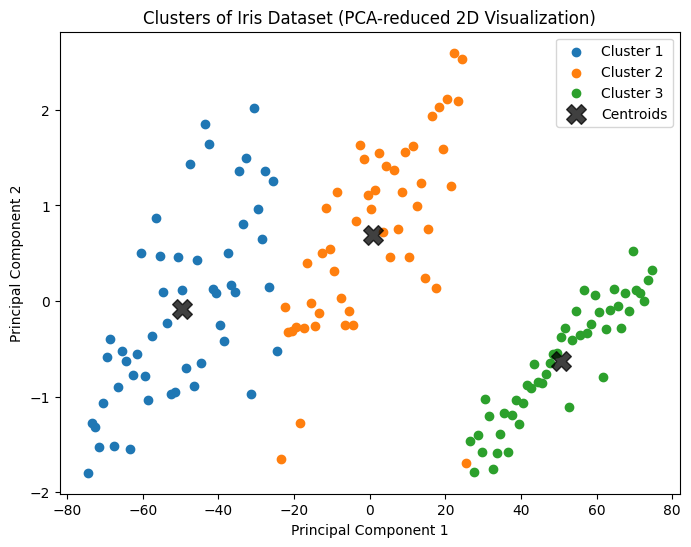

In [65]:
# Fitting the KMeans model with the optimal number of clusters
optimal_k = 3  # The optimal number of clusters is 3 based on the Elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(iris_data_encoded)

# Predicting the cluster for each data point
clusters = kmeans.predict(iris_data_encoded)

# Reducing the dataset to 2D using PCA for visualization
pca = PCA(n_components=2)
iris_data_2d = pca.fit_transform(iris_data_encoded)

# Creating a scatter plot of the clusters
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(iris_data_2d[clusters == i, 0], iris_data_2d[clusters == i, 1], label=f'Cluster {i+1}')

# Plotting cluster centers
centers_2d = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_2d[:, 0], centers_2d[:, 1], c='black', s=200, alpha=0.75, marker='X', label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters of Iris Dataset (PCA-reduced 2D Visualization)')
plt.legend()
plt.show()

### Step 5: Validate the number of clusters using the Silhouette score

The Silhouette score helps to validate the consistency within clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

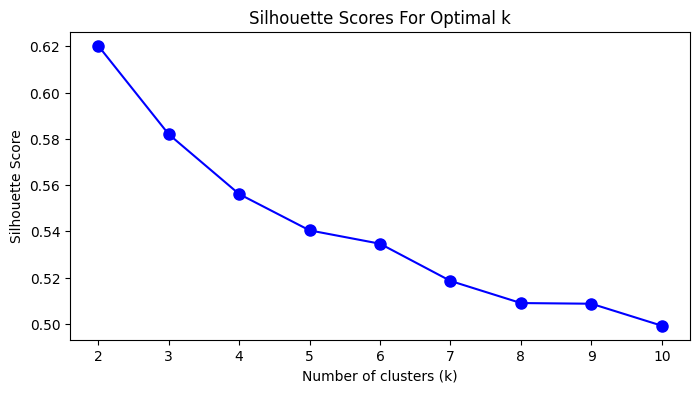

The optimal number of clusters based on silhouette scores: 2


In [66]:
# Computing silhouette scores for different values of k
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris_data_encoded)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(iris_data_encoded, labels))

# Plotting the Silhouette scores
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores For Optimal k')
plt.show()

# Finding the optimal number of clusters based on silhouette scores
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Add 2 because the range starts from 2
print(f"The optimal number of clusters based on silhouette scores: {optimal_k}")

### Step 6: Visualizing Clusters in a 2D Space using PCA for dimensionality reduction.

Using the optimal number of clusters found

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


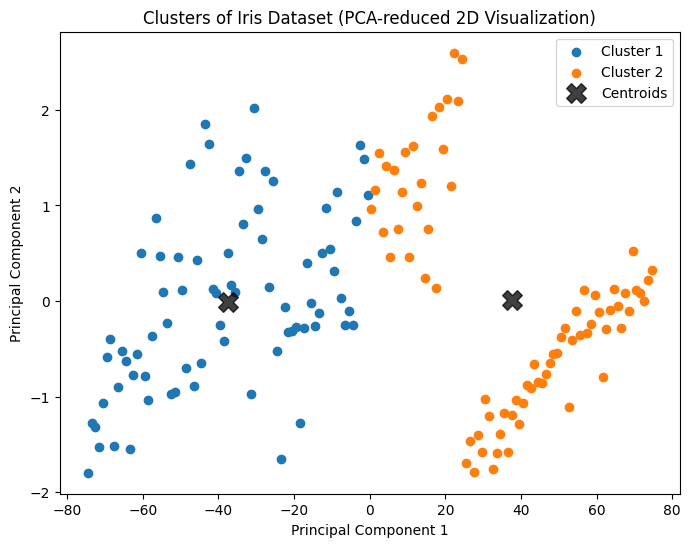

In [67]:
# Fitting the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(iris_data_encoded)

# Predicting the cluster for each data point
clusters = kmeans.predict(iris_data_encoded)

# Reducing the dataset to 2D using PCA for visualization
pca = PCA(n_components=2)
iris_data_2d = pca.fit_transform(iris_data_encoded)

# Creating a scatter plot of the clusters
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(iris_data_2d[clusters == i, 0], iris_data_2d[clusters == i, 1], label=f'Cluster {i+1}')

# Plotting cluster centers
centers_2d = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_2d[:, 0], centers_2d[:, 1], c='black', s=200, alpha=0.75, marker='X', label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters of Iris Dataset (PCA-reduced 2D Visualization)')
plt.legend()
plt.show()

**Conclusion:**

By following these steps, we can predict the optimum number of clusters for the Iris dataset and visualize the results effectively. Adjust the optimal_k value based on your analysis of the Elbow method and Silhouette scores.

**Key steps included:**

* **Data Preprocessing**: Ensured the dataset was clean and ready for clustering.

* **Elbow Method**: Used K-Means clustering and the Elbow method to determine the optimal 𝑘 by plotting inertia for different cluster counts.

* **PCA Visualization**: Visualized clusters using a 2D PCA-reduced plot.

* **Silhouette Score**: Validated cluster consistency and confirmed the optimal number of clusters using Silhouette scores.

* **Final Visualization**: Re-plotted clusters with the optimal number using PCA for dimensionality reduction.

This approach provided a robust and comprehensive analysis, leading to effective visualization and validation of the clustering results.